In [780]:
import math
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from pylab import *
from scipy.optimize import fmin
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score

### Get dataset from file and inspect 5 rows

In [781]:
# diabetes_df = pd.read_csv('dataset_diabetes/diabetic_data.csv')
diabetes_df = pd.read_csv('diabetes_dataset_updated.csv')
# print(diabetes_df.head())
diabetes_df.head()

C:\Users\Hooman\AppData\Local\Temp\ipykernel_16624\1880295637.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  diabetes_df = pd.read_csv('diabetes_dataset_updated.csv')


,e+A1:AP1ncounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Print summary of dataset columns

In [782]:
print(diabetes_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   e+A1:AP1ncounter_id       101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      99493 non-null   object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    3197 non-null    object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                61510 non-null   object
 11  medical_specialty         51817 non-null   object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

### Handling missing data (? should turned into null)

In [783]:
# diabetes_df.replace('?', None, inplace=True)
# updated_dataset_file = 'diabetes_dataset_updated.csv'
# diabetes_df.to_csv(updated_dataset_file, index=False)
# diabetes_df.head()

### Check for missing data

In [784]:
print(diabetes_df.isnull().sum())

e+A1:AP1ncounter_id             0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

### Weight Columns is missing most of the data, so we can remove its column

In [785]:
diabetes_df.drop(['weight'], axis=1, inplace=True)
print(diabetes_df.isnull().sum())

e+A1:AP1ncounter_id             0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Diag_1 Diag_2 Diag_3 for these columns we can get the average and put it for missing data

In [786]:
mode_diag_1 = diabetes_df['diag_1'].mode().values[0]
diabetes_df['diag_1'].fillna(mode_diag_1, inplace=True)

mode_diag_2 = diabetes_df['diag_2'].mode().values[0]
diabetes_df['diag_2'].fillna(mode_diag_2, inplace=True)

mode_diag_3 = diabetes_df['diag_3'].mode().values[0]
diabetes_df['diag_3'].fillna(mode_diag_3, inplace=True)

print(diabetes_df.isnull().sum())

e+A1:AP1ncounter_id             0
patient_nbr                     0
race                         2273
gender                          0
age                             0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide     

### Medical Specialty, Payer_code, and Race columns are missing half data, the best way to handle the missing data is to assign the most common data for the missing ones

In [787]:
# Get the most common data for medical_specialty with ascending sort and number of use
sorted_data = diabetes_df['medical_specialty'].value_counts().reset_index()
sorted_data.columns = ['medical_specialty', 'count']
sorted_data = sorted_data.sort_values('count', ascending=False)

print(sorted_data)

mode_specialty = diabetes_df['medical_specialty'].mode().values[0]
diabetes_df['medical_specialty'].fillna(mode_specialty, inplace=True)

mode_race = diabetes_df['race'].mode().values[0]
diabetes_df['race'].fillna(mode_race, inplace=True)

mode_payer_code = diabetes_df['payer_code'].mode().values[0]
diabetes_df['payer_code'].fillna(mode_payer_code, inplace=True)

print(diabetes_df.isnull().sum())

                   medical_specialty  count
0                   InternalMedicine  14635
1                   Emergency/Trauma   7565
2             Family/GeneralPractice   7440
3                         Cardiology   5352
4                    Surgery-General   3099
..                               ...    ...
67                      Perinatology      1
68                   Neurophysiology      1
69              Psychiatry-Addictive      1
70     Pediatrics-InfectiousDiseases      1
71  Surgery-PlasticwithinHeadandNeck      1

[72 rows x 2 columns]
e+A1:AP1ncounter_id         0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0

### Deleting unnecessary columns

In [788]:
# print(diabetes_df['readmitted'].unique())
columns_to_drop = ['e+A1:AP1ncounter_id', 'patient_nbr', 'medical_specialty', 'admission_source_id', 'payer_code',
                'examide', 'citoglipton']
diabetes_df = diabetes_df.drop(columns_to_drop, axis=1)

In [789]:
# Replace values in 'readmitted' column
diabetes_df['readmitted'] = diabetes_df['readmitted'].replace({'NO': 0, '>30': 0, '<30': 1})

### One-hot on gender column

In [790]:
# Assuming 'gender' is a categorical column in your 'diabetes_df' dataframe
gender_column = diabetes_df['gender']

# Perform one-hot encoding using pandas get_dummies()
gender_encoded_df = pd.get_dummies(gender_column, prefix='gender')

# Drop the original 'gender' column from diabetes_df
diabetes_df.drop('gender', axis=1, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
diabetes_df = pd.concat([diabetes_df, gender_encoded_df], axis=1)

### One-hot on race column

In [791]:
# Assuming 'race' is a categorical column in your dataframe
race_column = diabetes_df['race']

# Perform one-hot encoding using pandas get_dummies()
race_encoded_df = pd.get_dummies(race_column, prefix='race')

# Drop the original 'race' column from diabetes_df
diabetes_df.drop('race', axis=1, inplace=True)

# Concatenate the one-hot encoded dataframe with the original dataframe
diabetes_df = pd.concat([diabetes_df, race_encoded_df], axis=1)

### One-hot on age column

In [792]:
diabetes_df['age'] = diabetes_df['age'].replace({
    '[0-10)': 10,
    '[10-20)': 20,
    '[20-30)': 30,
    '[30-40)': 40,
    '[40-50)': 50,
    '[50-60)': 60,
    '[60-70)': 70,
    '[70-80)': 80,
    '[80-90)': 90,
    '[90-100)': 100
})

### Removing decimal from diag1 to 3 and replace string values (V50) to -1

In [793]:
diabetes_df['diag_1'] = diabetes_df['diag_1'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)
diabetes_df['diag_2'] = diabetes_df['diag_2'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)
diabetes_df['diag_3'] = diabetes_df['diag_3'].apply(lambda x: int(float(x)) if str(x).replace('.', '').isdigit() else -1)

### Change values of max_glu_serum column {'None': 0, '>300': 300, 'Norm': 1, '>200': 200}

In [794]:
# unique_values = diabetes_df['max_glu_serum'].unique()
# print(unique_values)
diabetes_df['max_glu_serum'] = diabetes_df['max_glu_serum'].map({'None': 0, '>300': 300, 'Norm': 1, '>200': 200})

### Change values of A1Cresult column {'None': 0, '>300': 300, 'Norm': 1, '>200': 200}

In [795]:
diabetes_df['A1Cresult'] = diabetes_df['A1Cresult'].map({'None': 0, '>8': 8, 'Norm': 1, '>7': 7})

### Change values of max_glu_serum column {'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3}


In [796]:
diabetes_df['metformin'] = diabetes_df['metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['repaglinide'] = diabetes_df['repaglinide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['nateglinide'] = diabetes_df['nateglinide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['chlorpropamide'] = diabetes_df['chlorpropamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glimepiride'] = diabetes_df['glimepiride'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['acetohexamide'] = diabetes_df['acetohexamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glipizide'] = diabetes_df['glipizide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glyburide'] = diabetes_df['glyburide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['tolbutamide'] = diabetes_df['tolbutamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['pioglitazone'] = diabetes_df['pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['rosiglitazone'] = diabetes_df['rosiglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['acarbose'] = diabetes_df['acarbose'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['miglitol'] = diabetes_df['miglitol'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['troglitazone'] = diabetes_df['troglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['tolazamide'] = diabetes_df['tolazamide'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['insulin'] = diabetes_df['insulin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glyburide-metformin'] = diabetes_df['glyburide-metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['metformin-rosiglitazone'] = diabetes_df['metformin-rosiglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glipizide-metformin'] = diabetes_df['glipizide-metformin'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['glimepiride-pioglitazone'] = diabetes_df['glimepiride-pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['metformin-pioglitazone'] = diabetes_df['metformin-pioglitazone'].map({'No': 0, 'Steady': 1, 'Up': 2, 'Down': 3})
diabetes_df['change'] = diabetes_df['change'].map({'No': 0, 'Ch': 1})
diabetes_df['diabetesMed'] = diabetes_df['diabetesMed'].map({'No': 0, 'Yes': 1})

# change no ch
# diabetesMed no yes
# unique_values = diabetes_df['diabetesMed'].unique()
# print(unique_values)
# diabetes_df.head(200)

## Create decision tree using Scikit-learn

Accuracy Train: 0.8904584090797425
Accuracy: 0.8868035766925421
Precision Train: 0.6188271604938271
Precision Test: 0.424
Recall Train: 0.04420194003527337
Recall Test: 0.023194748358862146

Decision Tree Feature Importances:
number_inpatient: 0.5304434496657338
discharge_disposition_id: 0.24781768900817214
number_diagnoses: 0.035643152755974516
num_lab_procedures: 0.034788558120822106
age: 0.020612317707653878
diag_2: 0.01995340524743102
num_medications: 0.018449858773320397
diag_1: 0.018266124951104582
number_emergency: 0.01584855853477963
diag_3: 0.01536136596189685
admission_type_id: 0.009932983721416955
num_procedures: 0.00920246307664439
insulin: 0.008536916907588388
race_Hispanic: 0.005541705864229729
time_in_hospital: 0.004898184474782023
diabetesMed: 0.004703265228449646


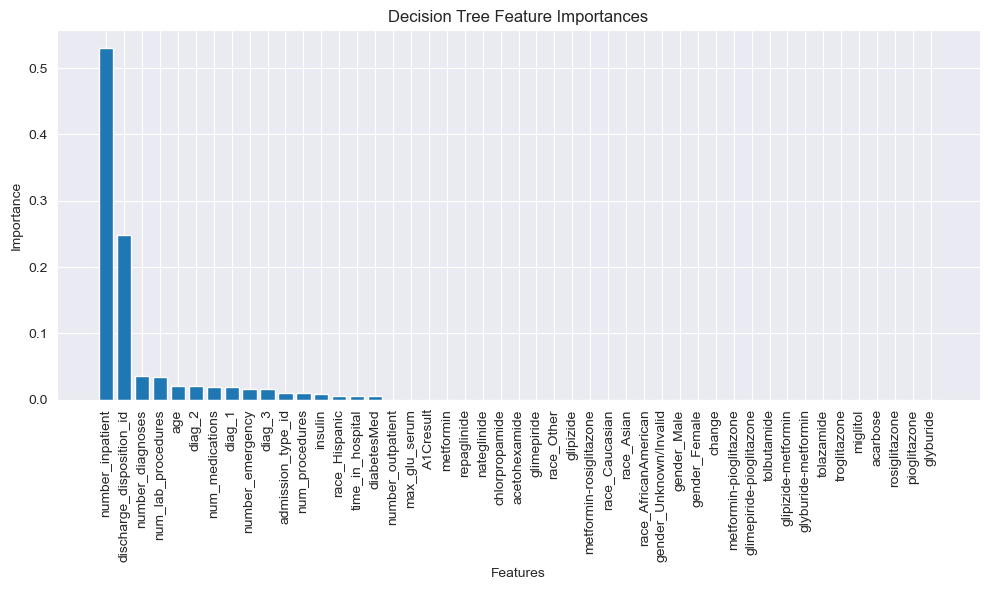

In [797]:
# Load the dataset
X = diabetes_df.drop('readmitted', axis=1)
y = diabetes_df['readmitted']

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier(max_depth=100, max_leaf_nodes=50)

# Fit the classifier to the training data
clf.fit(x_train, y_train)

# Make predictions on the test data
y_prediction_train = clf.predict(x_train)
y_prediction_test = clf.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_train, y_prediction_train)
print("Accuracy Train:", accuracy)
accuracy = accuracy_score(y_test, y_prediction_test)
print("Accuracy:", accuracy)

# Calculating precision and recall
precision_train = precision_score(y_train, y_prediction_train)
precision_test = precision_score(y_test, y_prediction_test)
recall_train = recall_score(y_train, y_prediction_train)
recall_test = recall_score(y_test, y_prediction_test)

print("Precision Train:", precision_train)
print("Precision Test:", precision_test)
print("Recall Train:", recall_train)
print("Recall Test:", recall_test)

# Get feature importance and sort
dt_feature_importance = clf.feature_importances_
sorted_dt_indices = dt_feature_importance.argsort()[::-1]

# Print sorted feature importance ( didn't show the zero features )
print("\nDecision Tree Feature Importances:")
for i in sorted_dt_indices:
    if dt_feature_importance[i] != 0:
        print(f"{X.columns[i]}: {dt_feature_importance[i]}")


sorted_features = X.columns[sorted_dt_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(dt_feature_importance)), dt_feature_importance[sorted_dt_indices])
plt.xticks(range(len(dt_feature_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Decision Tree Feature Importances')
plt.tight_layout()
plt.show()

## Create random forest using Scikit-learn

Accuracy Train: 0.8885667960497224
Accuracy Test: 0.887737054141692
Precision Train: 1.0
Precision Test: 1.0
Recall Train: 0.0
Recall Test: 0.0

Random Forest Feature Importance:
number_inpatient: 0.38050359325035654
discharge_disposition_id: 0.10745292676250078
number_emergency: 0.09419051959323534
num_medications: 0.04394915242763135
diag_1: 0.04279884873198515
time_in_hospital: 0.03760277964126655
diag_3: 0.034553340546839104
num_lab_procedures: 0.03340627403537962
number_diagnoses: 0.030311973292671667
diag_2: 0.02923144264084997
insulin: 0.02655930444672681
age: 0.02541249994506035
number_outpatient: 0.015127256898349796
admission_type_id: 0.014038087747546382
num_procedures: 0.010533452219598715
A1Cresult: 0.007983873893391277
metformin: 0.006312271052165239
max_glu_serum: 0.005345249284929251
diabetesMed: 0.0050912116707683445
glipizide: 0.004846219989343186
race_AfricanAmerican: 0.004053373813783686
race_Caucasian: 0.003936469815632607
change: 0.003935281450602764
glimepiride: 

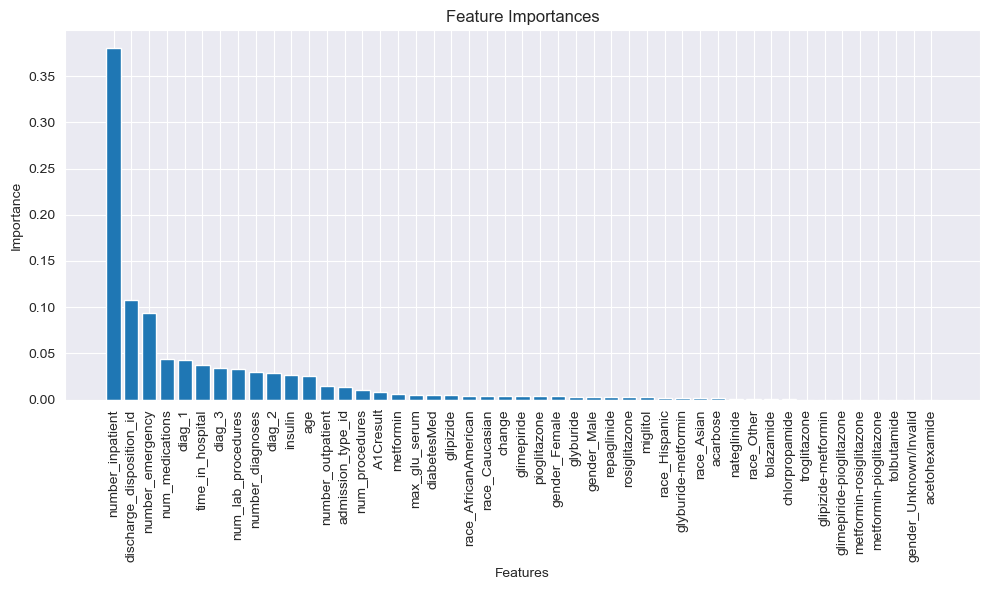

In [798]:
# Creating a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, max_depth=100, max_leaf_nodes=50)

# Fitting the model on the training data
rf_classifier.fit(x_train, y_train)

# Predicting on the test data
y_prediction_train = rf_classifier.predict(x_train)
y_prediction_test = rf_classifier.predict(x_test)

# Evaluating the model
accuracy = accuracy_score(y_train, y_prediction_train)
print("Accuracy Train:", accuracy)
accuracy = accuracy_score(y_test, y_prediction_test)
print("Accuracy Test:", accuracy)

# Calculating precision and recall
precision_train = precision_score(y_train, y_prediction_train, zero_division=1)
precision_test = precision_score(y_test, y_prediction_test, zero_division=1)
recall_train = recall_score(y_train, y_prediction_train, zero_division=1)
recall_test = recall_score(y_test, y_prediction_test, zero_division=1)

print("Precision Train:", precision_train)
print("Precision Test:", precision_test)
print("Recall Train:", recall_train)
print("Recall Test:", recall_test)

# Get feature importance and sort
rf_feature_importance = rf_classifier.feature_importances_
sorted_rf_indices = rf_feature_importance.argsort()[::-1]

# Print sorted feature importance
print("\nRandom Forest Feature Importance:")
for i in sorted_rf_indices:
    if rf_feature_importance[i] != 0:
        print(f"{X.columns[i]}: {rf_feature_importance[i]}")

# Sort feature importance and corresponding feature names
sorted_features = X.columns[sorted_rf_indices]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(range(len(rf_feature_importance)), rf_feature_importance[sorted_rf_indices])
plt.xticks(range(len(rf_feature_importance)), sorted_features, rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()


                               age  admission_type_id  \
age                       1.000000          -0.007209   
admission_type_id        -0.007209           1.000000   
discharge_disposition_id  0.114323           0.083483   
time_in_hospital          0.107515          -0.012500   
num_lab_procedures        0.020770          -0.143713   
num_procedures           -0.030104           0.129888   
num_medications           0.041847           0.079535   
number_outpatient         0.023724           0.026511   
number_emergency         -0.087291          -0.019116   
number_inpatient         -0.042861          -0.038161   
diag_1                    0.022657          -0.002258   
diag_2                    0.072248          -0.006694   
diag_3                    0.063250          -0.001908   
number_diagnoses          0.242597          -0.117126   
max_glu_serum             0.006216           0.271086   
A1Cresult                -0.134667          -0.035926   
metformin                -0.055

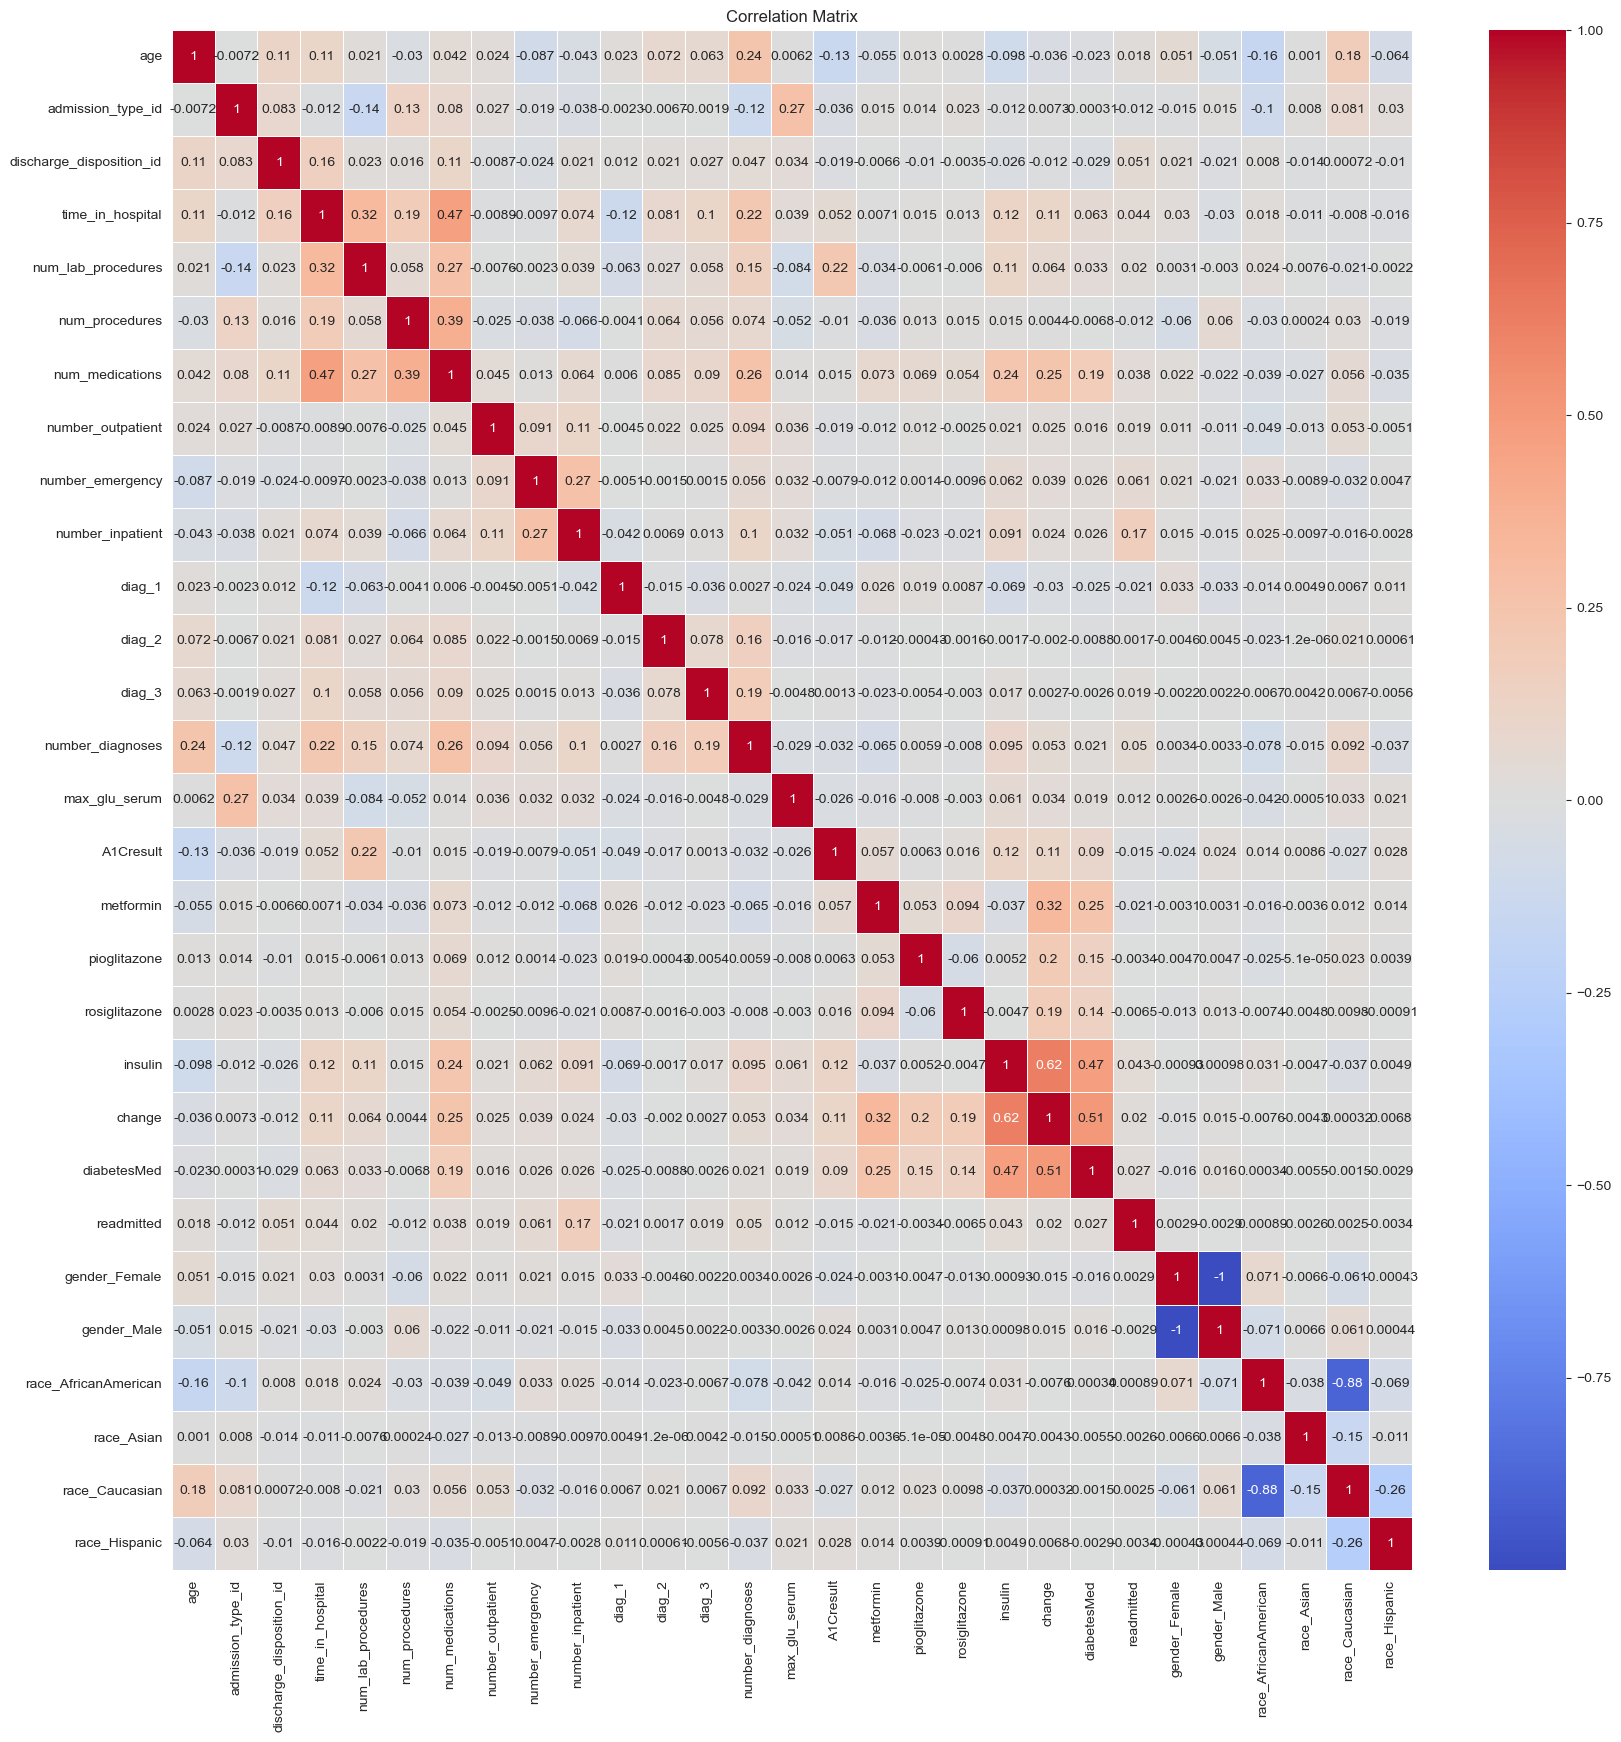

In [799]:
correlation_matrix = diabetes_df.corr()
print(correlation_matrix)

exclude_columns = ['repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'gender_Unknown/Invalid', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'race_Other']

# Selecting all features except the excluded columns
selected_features = diabetes_df.drop(exclude_columns, axis=1)

# Calculating the correlation matrix
correlation_matrix = selected_features.corr()

# Generate a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()